## Step 1: Check duplicates

In [30]:
import pandas as pd

In [31]:
#Read the csv file
df= pd.read_csv('option2-data.csv', sep = ";")

In [32]:
#Finding duplicates
df.duplicated().sum()

0

In [33]:
# Check the nomber of images that have the same filename and file_size. Should we consider them as duplicates?? I think No
df.duplicated(subset=['filename','file_size']).sum()

173

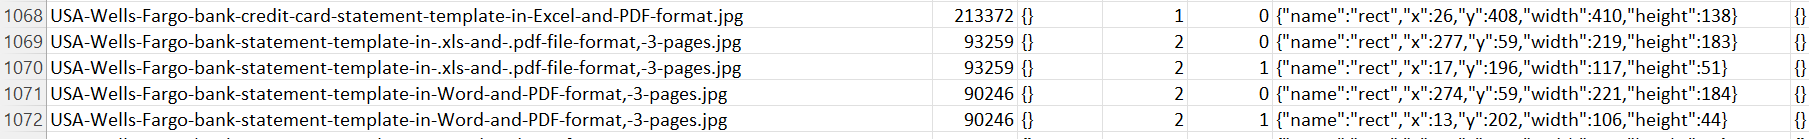

In [34]:
from IPython import display
display.Image("Screenshot_duplicates.png")
#Screenshot of the csv file
#Notice that some rows have the same filename and file_size but different coordinates.

In [35]:
#Explore the rows that have the same filename and file_size
df.loc[df.duplicated(subset=['filename','file_size']), :]

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,"filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes",Unnamed: 7
6,1-2.jpg,144789,{},2,1,"{""name"":""rect"",""x"":276,""y"":39,""width"":201,""hei...",{},NaN,NaN
18,Andorra-Andbank-bank-statement-template-in-Exc...,82664,{},3,1,"{""name"":""rect"",""x"":29,""y"":120,""width"":420,""hei...",{},NaN,NaN
19,Andorra-Andbank-bank-statement-template-in-Exc...,82664,{},3,2,"{""name"":""rect"",""x"":28,""y"":250,""width"":419,""hei...",{},NaN,NaN
21,Andorra-Andbank-bank-statement-template-in-Wor...,99910,{},3,1,"{""name"":""rect"",""x"":21,""y"":176,""width"":461,""hei...",{},NaN,NaN
22,Andorra-Andbank-bank-statement-template-in-Wor...,99910,{},3,2,"{""name"":""rect"",""x"":20,""y"":254,""width"":460,""hei...",{},NaN,NaN
...,...,...,...,...,...,...,...,...,...
1068,USA-Wells-Fargo-bank-statement-template-in-.xl...,93259,{},2,1,"{""name"":""rect"",""x"":17,""y"":196,""width"":117,""hei...",{},NaN,NaN
1070,USA-Wells-Fargo-bank-statement-template-in-Wor...,90246,{},2,1,"{""name"":""rect"",""x"":13,""y"":202,""width"":106,""hei...",{},NaN,NaN
1072,USA-Wells-Fargo-bank-statement-template-in-Wor...,116123,{},2,1,"{""name"":""rect"",""x"":267,""y"":60,""width"":222,""hei...",{},NaN,NaN
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,{},2,1,"{""name"":""rect"",""x"":52,""y"":359,""width"":369,""hei...",{},NaN,NaN


In [36]:
# Number of non duplicate 
(~df.duplicated()).sum()

1097

In [37]:
#Remark : if we decide to delete the rows that have the same filename, we have to run this code.
##Remark: for some raison if we put filename and file_size in the subset, it will not supress any row? We'll see???
                        #df.drop_duplicates(subset=['filename'],inplace=True)

In [38]:
#df 

In [39]:
df.duplicated(subset=['file_size']).sum() 

181

In [40]:
df.duplicated(subset=['filename']).sum()

177

## Step 2: Cleaning the data 

In [41]:
#Drop all rows that include {} in region_shape_attribute (the column of name:rect, x, y, weidth, height)
df = df[df.region_shape_attributes != "{}"]

In [42]:
#Drop rows where the filename is #NOM?
df = df[df.filename != "#NOM?"]

In [43]:
#Explore the row 435 that includes {} in csv
df.loc[435:]

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,"filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes",Unnamed: 7
435,Ireland-AIB-bank-statement--template-in-Word-f...,126625,{},1,0,"{""name"":""rect"",""x"":15,""y"":220,""width"":337,""hei...",{},NaN,NaN
438,Israel-Bank-Hapoalim-bank-statement-easy-to-fi...,222665,{},1,0,"{""name"":""rect"",""x"":31,""y"":173,""width"":407,""hei...",{},NaN,NaN
439,Israel-Bank-Hapoalim-proof-of-address-bank-sta...,181748,{},1,0,"{""name"":""rect"",""x"":41,""y"":185,""width"":397,""hei...",{},NaN,NaN
440,Israel-First-International-Bank-of-Israel-bank...,171547,{},1,0,"{""name"":""rect"",""x"":49,""y"":174,""width"":377,""hei...",{},NaN,NaN
441,Israel-First-International-Bank-of-Israel-proo...,231181,{},1,0,"{""name"":""rect"",""x"":27,""y"":201,""width"":423,""hei...",{},NaN,NaN
...,...,...,...,...,...,...,...,...,...
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,{},2,1,"{""name"":""rect"",""x"":52,""y"":359,""width"":369,""hei...",{},NaN,NaN
1092,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,{},2,0,"{""name"":""rect"",""x"":31,""y"":274,""width"":405,""hei...",{},NaN,NaN
1093,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,{},2,1,"{""name"":""rect"",""x"":31,""y"":405,""width"":404,""hei...",{},NaN,NaN
1094,Yemen-International-bank-of-Yemen-proof-of-add...,208654,{},1,0,"{""name"":""rect"",""x"":52,""y"":222,""width"":370,""hei...",{},NaN,NaN


In [44]:
#Drop useless columns
df1= df.drop(['file_attributes', 'region_attributes',
              'filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes',
              'Unnamed: 7'], axis=1)

#Explore the data after this cleaning
df1

,filename,file_size,region_count,region_id,region_shape_attributes
0,NaN,180356,1,0,"{""name"":""rect"",""x"":22,""y"":258,""width"":421,""hei..."
1,NaN,209498,1,0,"{""name"":""rect"",""x"":19,""y"":205,""width"":400,""hei..."
2,NaN,240797,1,0,"{""name"":""rect"",""x"":21,""y"":181,""width"":425,""hei..."
3,NaN,250404,1,0,"{""name"":""rect"",""x"":21,""y"":136,""width"":415,""hei..."
4,NaN,255342,1,0,"{""name"":""rect"",""x"":35,""y"":301,""width"":409,""hei..."
...,...,...,...,...,...
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,2,1,"{""name"":""rect"",""x"":52,""y"":359,""width"":369,""hei..."
1092,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,0,"{""name"":""rect"",""x"":31,""y"":274,""width"":405,""hei..."
1093,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,1,"{""name"":""rect"",""x"":31,""y"":405,""width"":404,""hei..."
1094,Yemen-International-bank-of-Yemen-proof-of-add...,208654,1,0,"{""name"":""rect"",""x"":52,""y"":222,""width"":370,""hei..."


In [45]:
#Drop rows where there are Nan
#we can replace Nan values with average or other values..We'll see with Assan!
df1 = df1.dropna()

In [46]:
#Drop the first three rows where filename is incoherent
df2= df1.drop(df1.index[[0,1,2]])
df2

,filename,file_size,region_count,region_id,region_shape_attributes
8,Addiko-bank-st.jpg,187754,1,0,"{""name"":""rect"",""x"":36,""y"":377,""width"":393,""hei..."
9,Albania-Bank-of-Albania-bank-statement-templat...,154649,1,0,"{""name"":""rect"",""x"":39,""y"":211,""width"":358,""hei..."
10,Albania-Bank-of-Albania-bank-statement-templat...,187745,1,0,"{""name"":""rect"",""x"":24,""y"":238,""width"":430,""hei..."
11,Albania-ProCreditBank-proof-of-address-bank-st...,160001,1,0,"{""name"":""rect"",""x"":42,""y"":159,""width"":391,""hei..."
12,Albania-ProCredit-bank-statement-template-in-E...,156443,1,0,"{""name"":""rect"",""x"":40,""y"":142,""width"":396,""hei..."
...,...,...,...,...,...
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,2,1,"{""name"":""rect"",""x"":52,""y"":359,""width"":369,""hei..."
1092,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,0,"{""name"":""rect"",""x"":31,""y"":274,""width"":405,""hei..."
1093,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,1,"{""name"":""rect"",""x"":31,""y"":405,""width"":404,""hei..."
1094,Yemen-International-bank-of-Yemen-proof-of-add...,208654,1,0,"{""name"":""rect"",""x"":52,""y"":222,""width"":370,""hei..."


In [47]:
#Replace { or } by spaces
#Remark: we don't replace the comma here: comme in between the two brackets means or
# we still need commas to split a column later
df2 = df2.replace('[{,}]', regex=True)

In [48]:
# Replace strings and non numerci values by spaces
#Remark: if we don't want to delete name:rect we have just to precise x, y, width, height using .str.replace("x",'')
#then for y and so on instead of str.replace(r'[a-z]+','') wich replace all strings.
# Remark: applymap and lambda can be used to clean but the entire data.
df2['region_shape_attributes'] = df2['region_shape_attributes'].str.replace(r'[a-z]+','').str.replace('"":','').str.replace('{"",','').str.replace('}','')
df2.head()
# Remark: applymap and lambda can be used to clean but the entire data 

C:\Users\manar\AppData\Local\Temp/ipykernel_2340/2091856891.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['region_shape_attributes'] = df2['region_shape_attributes'].str.replace(r'[a-z]+','').str.replace('"":','').str.replace('{"",','').str.replace('}','')
C:\Users\manar\AppData\Local\Temp/ipykernel_2340/2091856891.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['region_shape_attributes'] = df2['region_shape_attributes'].str.replace(r'[a-z]+','').str.replace('"":','').str.replace('{"",','').str.replace('}','')


,filename,file_size,region_count,region_id,region_shape_attributes
8,Addiko-bank-st.jpg,187754,1,0,"36,377,393,128"
9,Albania-Bank-of-Albania-bank-statement-templat...,154649,1,0,"39,211,358,337"
10,Albania-Bank-of-Albania-bank-statement-templat...,187745,1,0,"24,238,430,309"
11,Albania-ProCreditBank-proof-of-address-bank-st...,160001,1,0,"42,159,391,332"
12,Albania-ProCredit-bank-statement-template-in-E...,156443,1,0,"40,142,396,405"


## Step 3 : Split the region_shape_attributes column into 4 columns
Different methods can be used to split a column of numeric values. I decided to convert the column to string, Split it with str.split into four columns, Convert it back to numeric and concatenate the new 4 columns with the initial data frame.

3.1. Convert the column into string and display the new column

In [49]:
#Covert to string using .astype(str)
string_column = df2['region_shape_attributes'] = df2['region_shape_attributes'].astype(str)
string_column

8       36,377,393,128
9       39,211,358,337
10      24,238,430,309
11      42,159,391,332
12      40,142,396,405
             ...      
1091     52,359,369,99
1092     31,274,405,97
1093    31,405,404,104
1094    52,222,370,319
1095    26,200,384,267
Name: region_shape_attributes, Length: 1067, dtype: object

3.2. Split the column into four columns and rename them

In [50]:
#After converting the column to string we can split it using str.split:
# Remark: columns are given by default  the name O ,1, 2,3,
# We can add the names we want or rename them later
splited =string_column.str.split("," , n = 4,expand =True)
splited

,0,1,2,3
8,36,377,393,128
9,39,211,358,337
10,24,238,430,309
11,42,159,391,332
12,40,142,396,405
...,...,...,...,...
1091,52,359,369,99
1092,31,274,405,97
1093,31,405,404,104
1094,52,222,370,319


In [51]:
#Verify if it's realy string
splited_type=splited.dtypes
print(splited_type)

0    object
1    object
2    object
3    object
dtype: object


In [52]:
#Rename the 4 columns and diplay them
renamed_splited=splited.rename(columns={0: "X", 1: "Y", 2: "Width", 3:"Height"})
renamed_splited.head()

,X,Y,Width,Height
8,36,377,393,128
9,39,211,358,337
10,24,238,430,309
11,42,159,391,332
12,40,142,396,405


3.3.Convert the four new columns to integer

In [53]:
# we can convert column by column using the code below: for x and repeate it for y and so on
#      renamed_splited["X"] = pd.to_numeric(renamed_splited["X"])
#Or we can convert the four columns using a for loop 

In [54]:
# Convert to numeric with for loop
multicol= ["X","Y","Width","Height"]
for col in multicol:
    renamed_splited[col] = pd.to_numeric(renamed_splited[col])

In [55]:
#Verify the type of data renamed_splited after converting
renamed_splited_type=renamed_splited.dtypes
print(renamed_splited_type)

X         int64
Y         int64
Width     int64
Height    int64
dtype: object


3.4. Concatenate the new 4 columns with the initial data frame.

In [56]:
# Remark: rename_splited includes is a small data frma that includes the four new columns
df3 = pd.concat([df2,renamed_splited], axis=1)
df3

,filename,file_size,region_count,region_id,region_shape_attributes,X,Y,Width,Height
8,Addiko-bank-st.jpg,187754,1,0,"36,377,393,128",36,377,393,128
9,Albania-Bank-of-Albania-bank-statement-templat...,154649,1,0,"39,211,358,337",39,211,358,337
10,Albania-Bank-of-Albania-bank-statement-templat...,187745,1,0,"24,238,430,309",24,238,430,309
11,Albania-ProCreditBank-proof-of-address-bank-st...,160001,1,0,"42,159,391,332",42,159,391,332
12,Albania-ProCredit-bank-statement-template-in-E...,156443,1,0,"40,142,396,405",40,142,396,405
...,...,...,...,...,...,...,...,...,...
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,2,1,"52,359,369,99",52,359,369,99
1092,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,0,"31,274,405,97",31,274,405,97
1093,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,1,"31,405,404,104",31,405,404,104
1094,Yemen-International-bank-of-Yemen-proof-of-add...,208654,1,0,"52,222,370,319",52,222,370,319


## Step 4 : Cleaning the dataset after the concatenating

In [57]:
#Drop the old column that includes 4 values in each row
df4 =df3.drop('region_shape_attributes', axis= 1)
df4

,filename,file_size,region_count,region_id,X,Y,Width,Height
8,Addiko-bank-st.jpg,187754,1,0,36,377,393,128
9,Albania-Bank-of-Albania-bank-statement-templat...,154649,1,0,39,211,358,337
10,Albania-Bank-of-Albania-bank-statement-templat...,187745,1,0,24,238,430,309
11,Albania-ProCreditBank-proof-of-address-bank-st...,160001,1,0,42,159,391,332
12,Albania-ProCredit-bank-statement-template-in-E...,156443,1,0,40,142,396,405
...,...,...,...,...,...,...,...,...
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,2,1,52,359,369,99
1092,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,0,31,274,405,97
1093,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,1,31,405,404,104
1094,Yemen-International-bank-of-Yemen-proof-of-add...,208654,1,0,52,222,370,319


In [58]:
#Verify the final data type 
final_type=df4.dtypes
print(final_type)

filename        object
file_size        int64
region_count     int64
region_id        int64
X                int64
Y                int64
Width            int64
Height           int64
dtype: object


In [59]:
# Extra Cleaning:  dropping all rows that have miss values in one of the columns  
df4.dropna(subset=['filename','file_size','region_count', 'region_id', 'X', 'Y', 'Width','Height'])

,filename,file_size,region_count,region_id,X,Y,Width,Height
8,Addiko-bank-st.jpg,187754,1,0,36,377,393,128
9,Albania-Bank-of-Albania-bank-statement-templat...,154649,1,0,39,211,358,337
10,Albania-Bank-of-Albania-bank-statement-templat...,187745,1,0,24,238,430,309
11,Albania-ProCreditBank-proof-of-address-bank-st...,160001,1,0,42,159,391,332
12,Albania-ProCredit-bank-statement-template-in-E...,156443,1,0,40,142,396,405
...,...,...,...,...,...,...,...,...
1091,"Yemen-Gulf-bank-statement-template,-Word-and-P...",147935,2,1,52,359,369,99
1092,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,0,31,274,405,97
1093,Yemen-Gulf-Bank-statement-template-in-Excel-an...,172033,2,1,31,405,404,104
1094,Yemen-International-bank-of-Yemen-proof-of-add...,208654,1,0,52,222,370,319


In [60]:
# Information about the data
everymean= df4.mean()
everymean

C:\Users\manar\AppData\Local\Temp/ipykernel_2340/169473318.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  everymean= df4.mean()


file_size       172177.390815
region_count         1.414246
region_id            0.207123
X                   47.791940
Y                  212.447985
Width              372.659794
Height             225.065604
dtype: float64

In [61]:
#Export the dateframe as a csv file 
df4.to_csv('/path where you want to save the file/select csv file name')

FileNotFoundError: [Errno 2] No such file or directory: '/path where you want to save the file/select csv file name'

pandas.DataFrame.dropna
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
Split a string in a CSV file by delimiter
https://stackoverflow.com/questions/54546368/python-split-a-string-in-a-csv-file-by-delimiter
https://datascienceparichay.com/article/split-pandas-column-of-lists-into-multiple-columns/
How to remove numbers from string terms in a pandas dataframe
https://stackoverflow.com/questions/41719259/how-to-remove-numbers-from-string-terms-in-a-pandas-dataframe
Remove unwanted parts from strings in a range of columns
https://stackoverflow.com/questions/36813414/remove-unwanted-parts-from-strings-in-a-range-of-columns
Rename columns / index names 
https://note.nkmk.me/en/python-pandas-dataframe-rename/
add image
https://ealizadeh.com/blog/3-ways-to-add-images-to-your-jupyter-notebook
Finding and removing duplicate
https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f#:~:text=5.-,Dropping%20duplicate%20rows,()%20to%20drop%20duplicate%20rows.&text=Note%20that%20we%20started%20out,duplicates%20from%20the%20original%20DataFrame.

                                          #Merry Christmas and happy clean new year#